In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import pickle 
from QPCA.preprocessingUtilities.preprocessing import generate_matrix

# Define input matrix and hyperparameters

In [2]:
seed=4747
matrix_dimension=4
eigenvalues_list=[0.65,0.25,0.06,0.04]
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed,eigenvalues_list=eigenvalues_list)
shots_numbers=[1000000]

Matrix:
 [[0.12 0.04 0.06 0.14]
 [0.04 0.31 0.16 0.11]
 [0.06 0.16 0.18 0.18]
 [0.14 0.11 0.18 0.39]]

eigenvalue: 0.03999999999999994 - eigenvector: [ 0.23  -0.357  0.812 -0.4  ]
eigenvalue: 0.059999999999999984 - eigenvector: [-0.882 -0.207  0.303  0.295]
eigenvalue: 0.24999999999999994 - eigenvector: [-0.304  0.772  0.163 -0.534]
eigenvalue: 0.6500000000000001 - eigenvector: [-0.277 -0.483 -0.471 -0.685]


# Check resolution impact

### 3 resolution qubits

First, we define a low number of resolution qubits (3), and we reconstruct the eigenvectors, showing the peaks plot. This plot shows how the phase estimation approximates the eigenvalues and which eigenvalues we are able to reconstruct. The reconstructed eigenvalues are represented by the peaks in the plot.



Resolution:  3




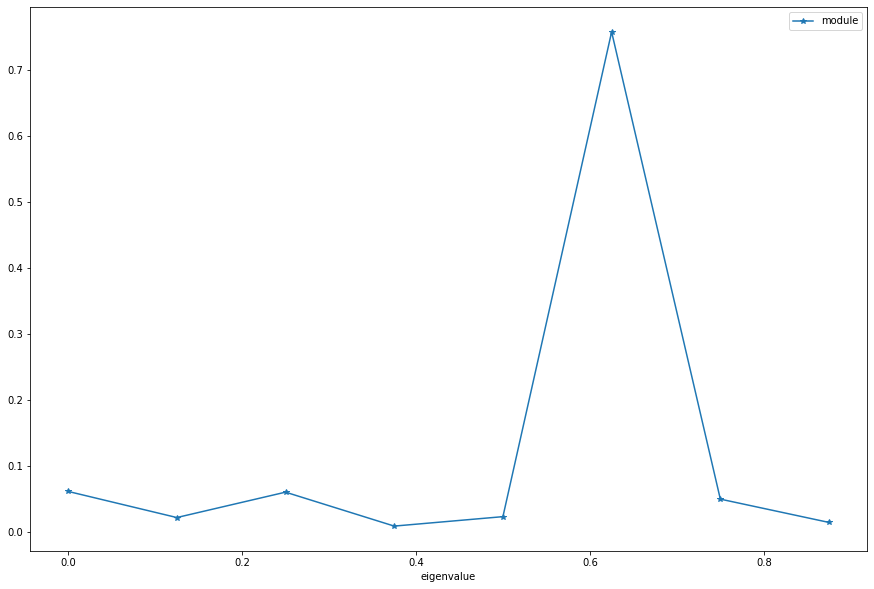

In [3]:
resolutions=[3]
for resolution in resolutions:
    qpca=QPCA().fit(input_matrix,resolution=resolution)
    print('\n')
    print('\033[1m'+'Resolution: ',resolution)
    print('\n')
    for s in shots_numbers:
        reconstructed_eigenvectors=qpca.eigenvectors_reconstruction(n_shots=s,n_repetitions=1,plot_peaks=True)
        

With 3 qubits of resolution, we can see that we are able to obtain only two peaks in correspondence of 0.625 and 0.25. Therefore, as we can see in the next plots, we can reconstruct only the corresponding two eigenvectors.

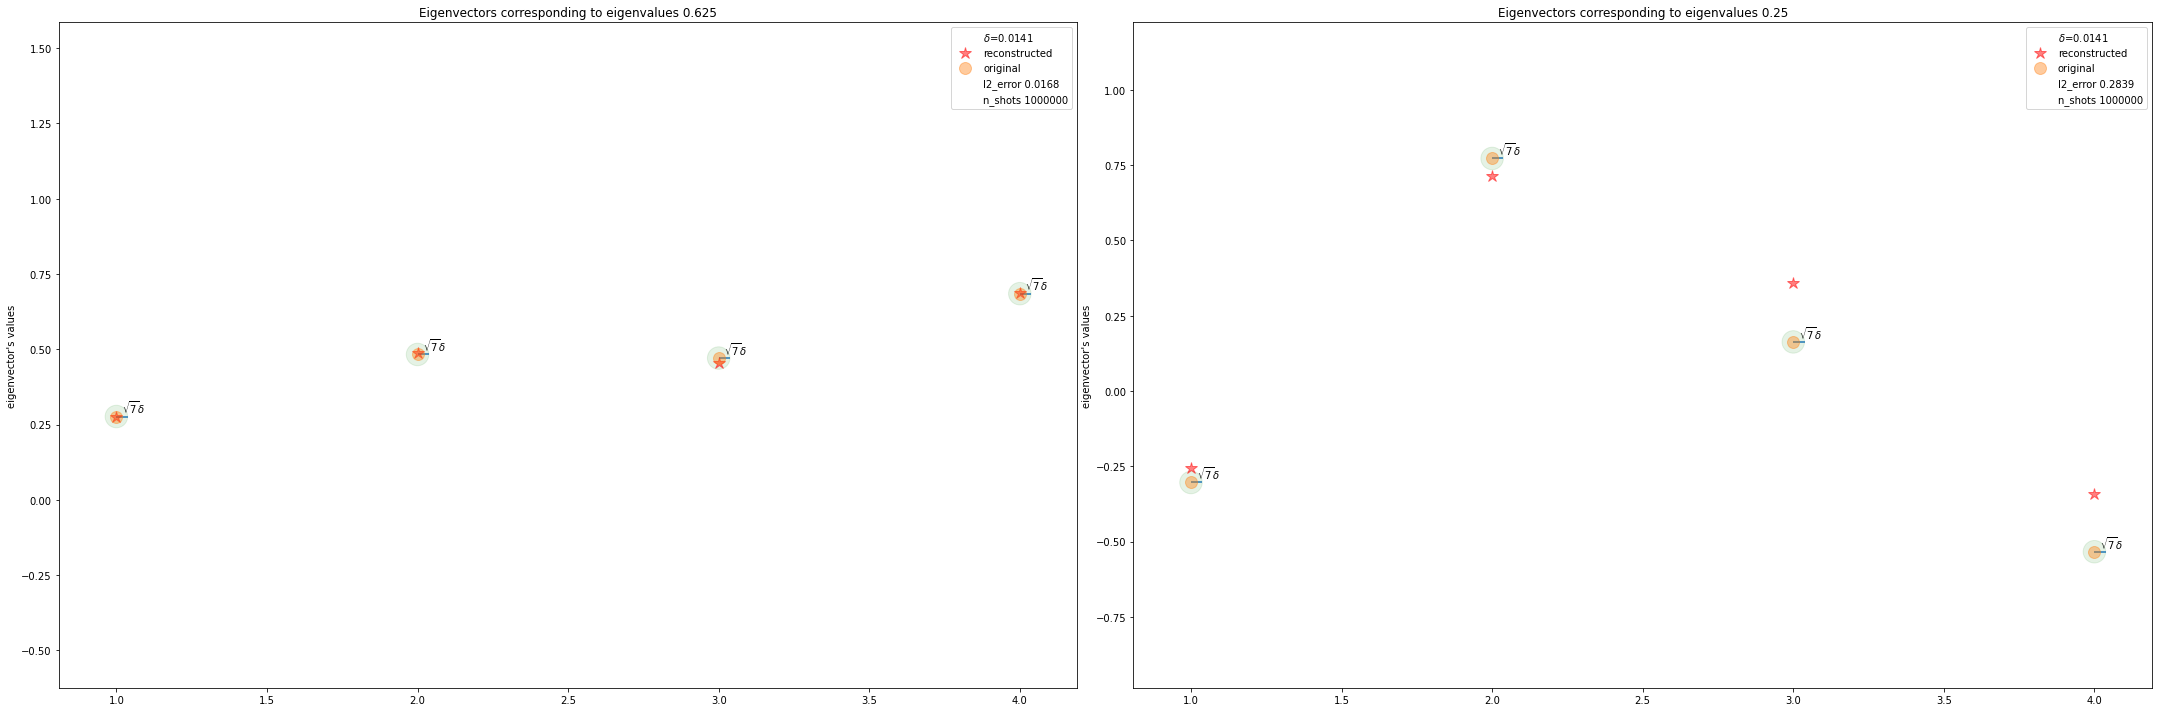

In [4]:
results=qpca.spectral_benchmarking(eigenvector_benchmarking=True,sign_benchmarking=False ,eigenvalues_benchmarching=False,print_distances=True,only_first_eigenvectors=False,
                                                        plot_delta=True,distance_type='l2',error_with_sign=True,hide_plot=False,print_error=False)

We also report the eigenvalues plot for a complete view of the experiments with all the absolute reconstruction errors.

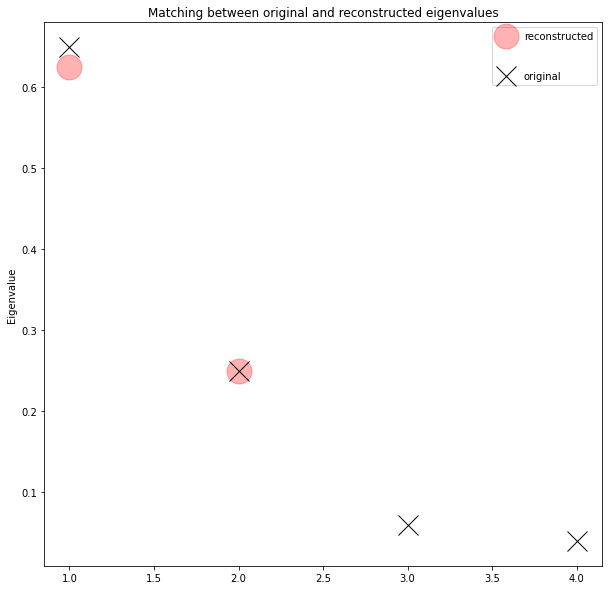

+-----------------+--------------------------+-------+
| True eigenvalue | Reconstructed eigenvalue | error |
+=================+==========================+=======+
| 0.650           | 0.625                    | 0.025 |
+-----------------+--------------------------+-------+
| 0.250           | 0.250                    | 0.000 |
+-----------------+--------------------------+-------+


[]

In [5]:
qpca.spectral_benchmarking(eigenvector_benchmarking=False,sign_benchmarking=False ,eigenvalues_benchmarching=True,print_distances=True,only_first_eigenvectors=False,
                                                        plot_delta=True,distance_type='l2',error_with_sign=True,hide_plot=False,print_error=True)

### 8 resolution qubits

We have seen that with 3 resolution qubits, we are not able to reconstruct all the eigenvalues/eigenvectors. So, we can increase the resolution; we choose 8.

We can see that now the peaks in the plot are more evident and, moreover, are 4. So, with 8 resolution qubits, we are able to reconstruct 4 eigenvalues/eigenvectors.



Resolution:  8




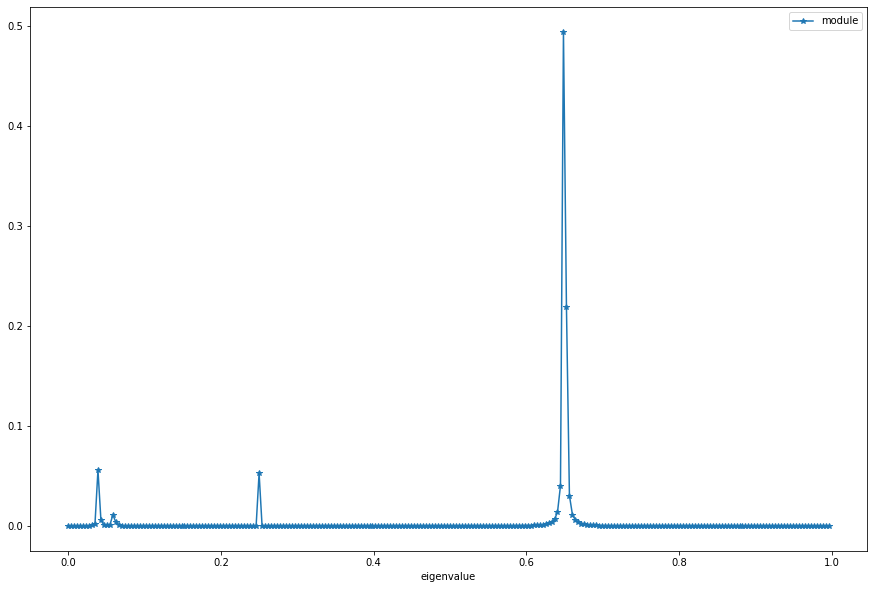

In [6]:
resolutions=[8]
for resolution in resolutions:
    qpca=QPCA().fit(input_matrix,resolution=resolution)
    print('\n')
    print('\033[1m'+'Resolution: ',resolution)
    print('\n')
    for s in shots_numbers:
        reconstructed_eigenvectors=qpca.eigenvectors_reconstruction(n_shots=s,n_repetitions=1,plot_peaks=True)
        

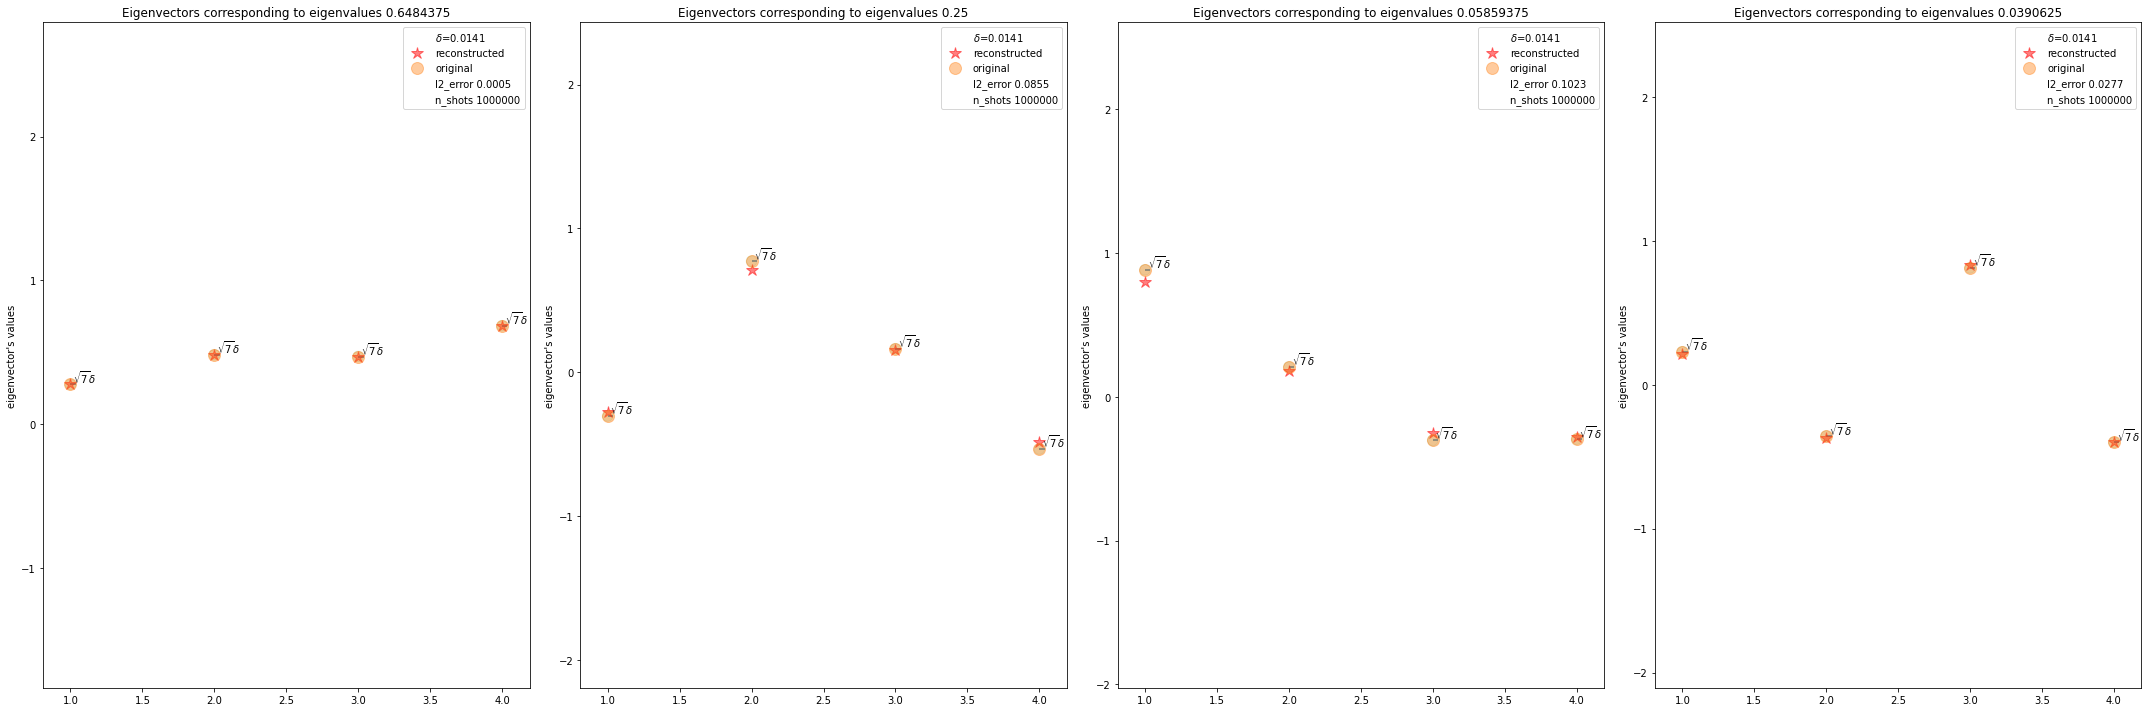

In [8]:
results=qpca.spectral_benchmarking(eigenvector_benchmarking=True,sign_benchmarking=False ,eigenvalues_benchmarching=False,print_distances=True,only_first_eigenvectors=False,
                                                        plot_delta=True,distance_type='l2',error_with_sign=True,hide_plot=False,print_error=False)

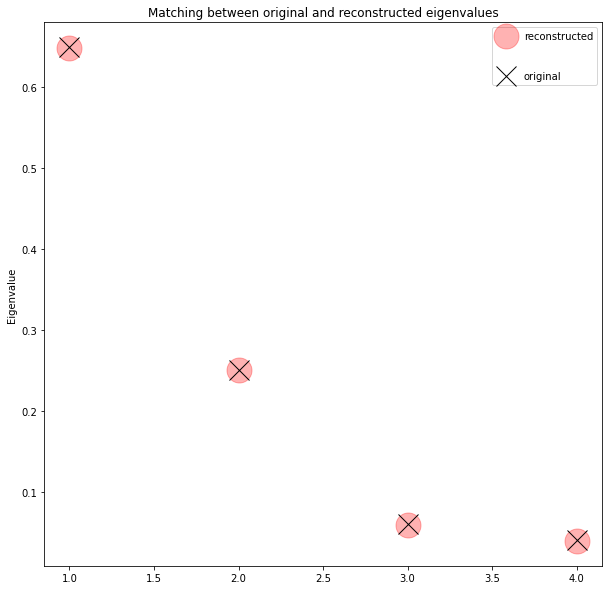

+-----------------+--------------------------+-------+
| True eigenvalue | Reconstructed eigenvalue | error |
+=================+==========================+=======+
| 0.650           | 0.648                    | 0.002 |
+-----------------+--------------------------+-------+
| 0.250           | 0.250                    | 0.000 |
+-----------------+--------------------------+-------+
| 0.060           | 0.059                    | 0.001 |
+-----------------+--------------------------+-------+
| 0.040           | 0.039                    | 0.001 |
+-----------------+--------------------------+-------+


[]

In [9]:
qpca.spectral_benchmarking(eigenvector_benchmarking=False,sign_benchmarking=False ,eigenvalues_benchmarching=True,print_distances=True,only_first_eigenvectors=False,
                                                        plot_delta=True,distance_type='l2',error_with_sign=True,hide_plot=False,print_error=True)

By observing the results, we can see that not only are we able to reconstruct more eigenvalues/eigenvectors, but we also reconstruct them with more precision. Take a look for example at the first eigenvalue: with 3 resoltion qubits, we reconstruct it with an error of 0.025, while with 8 resolution qubits we decrease the error to 0.002. Even by looking to the reconstructed eigenvector plots, we can see the benefit: from an l2-error of 0.0168 with 3 resolution qubits, we got 0.0005 with 8 qubits. 

For the second eigenvalue (0.25), even if we are able to reconstruct it exactly in both the configurations, we can notice that, by increasing the resolution, we obtain a benefit in terms of reconstruction error for the corresponding eigenvector: we go from an error of 0.2839 to 0.0855. A great decrease!